# ADOBE vs VGT - Vanguard Tech ETF
### Entry Threshold:	2.00 | Exit Threshold:	0.30 | Max Duration:	20 | 
### MA Period:	30	MA Type:	EMA	| StdDev Period:	15 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2018, 1, 1)  # The start of the year for example
end= datetime.datetime(2021, 10, 30)

In [3]:
ticker_1 = "ADBE"
ticker_2 = "VGT"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,309.059998,304.890015,305.000000,307.899994,2619000,307.899994
2019-11-27,309.170013,305.739990,308.500000,309.059998,1469700,309.059998
2019-11-29,310.000000,308.000000,308.519989,309.529999,1175100,309.529999
2019-12-02,309.899994,299.510010,309.220001,302.750000,2891400,302.750000
2019-12-03,304.459991,297.320007,298.239990,303.910004,1608500,303.910004


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,236.320007,235.360001,235.660004,235.690002,461700.0,235.690002
2019-11-27,237.149994,235.850006,236.490005,237.149994,321500.0,237.149994
2019-11-29,236.869995,236.080002,236.479996,236.149994,189500.0,236.149994
2019-12-02,236.490005,231.729996,236.419998,232.789993,515600.0,232.789993
2019-12-03,231.009995,228.009995,228.990005,230.940002,578900.0,230.940002


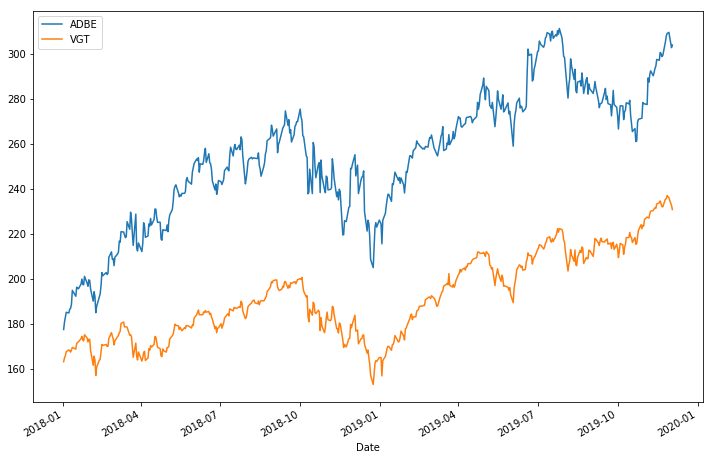

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

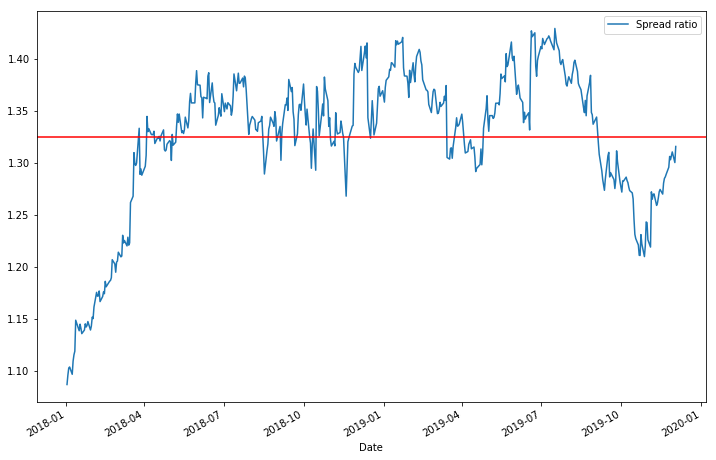

In [9]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [10]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

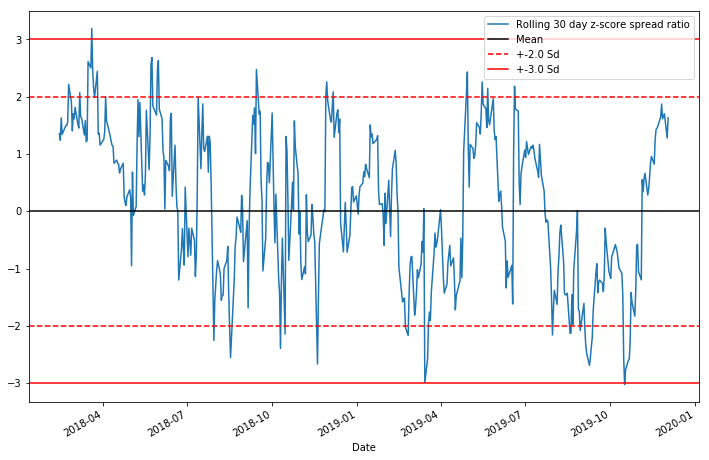

In [11]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+-2.0 Sd', '+-3.0 Sd']);

In [12]:
from statsmodels.tsa.stattools import coint

In [13]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [14]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [15]:
print('\n--------Engel-Granger Co-Integration Test-----------\n')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('\n--------------------------------------\n')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))


--------Engel-Granger Co-Integration Test-----------

T-stat for the pair ADBE VS VGT: -3.1439396490272173
Alpha value for the T-stat:  0.07981391648058017

--------------------------------------

T-stat 99%:  -3.9192584556494308
T-stat 95%:  -3.3488095575445045
T-stat 90%:  -3.0532426117390874


In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('\n-----------Augmented Dickey-Fuller Test: ----------\n')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary\n")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary\n ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -3.479490951067473
p-value : 0.008529699362066764
#Lags Used : 1
Number of Observations Used : 482

strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Dickey Fuller Confidence Intervals:   {'1%': -3.4439899743408136, '5%': -2.8675550551408353, '10%': -2.569973792117904}


In [17]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.90414527],
       [0.90414527, 1.        ]])

In [18]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[874.45884491, 507.82564396],
       [507.82564396, 360.75591105]])

In [19]:
zscore_30_1_ratio[-20:]

Date
2019-11-05    0.551185
2019-11-06    0.343922
2019-11-07    0.577158
2019-11-08    0.664216
2019-11-11    0.284274
2019-11-12    0.395609
2019-11-13    0.598907
2019-11-14    0.849376
2019-11-15    0.957910
2019-11-18    0.823497
2019-11-19    1.260075
2019-11-20    1.431905
2019-11-21    1.451167
2019-11-22    1.490783
2019-11-25    1.653111
2019-11-26    1.871480
2019-11-27    1.614948
2019-11-29    1.702473
2019-12-02    1.280131
2019-12-03    1.632111
Name: Adj Close, dtype: float64

In [20]:
spread_ratio[-20:]

Date
2019-11-05    1.272387
2019-11-06    1.265355
2019-11-07    1.269904
2019-11-08    1.270460
2019-11-11    1.259360
2019-11-12    1.261656
2019-11-13    1.266678
2019-11-14    1.272488
2019-11-15    1.274690
2019-11-18    1.270240
2019-11-19    1.280729
2019-11-20    1.285335
2019-11-21    1.286766
2019-11-22    1.289253
2019-11-25    1.295976
2019-11-26    1.306377
2019-11-27    1.303226
2019-11-29    1.310735
2019-12-02    1.300528
2019-12-03    1.315970
Name: Adj Close, dtype: float64

In [21]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)


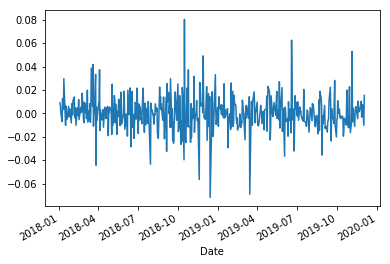

In [22]:
#plot the differenced spread
t_series_lag_1.plot()

In [23]:
#statsmodels.tsa.stattools.adfuller()

In [24]:
spreadratio_ewmamavg30 = spread_ratio.ewm(30).mean()

##  vgt top holdings : ADBE; intel; cisco; apple; - co-integrated